# 現場で使える機械学習・データ分析基礎講座　Day1課題

# Kickstarter Projects

## Kickstarterとは


Kickstarterとは2009年に設立されたアメリカ合衆国の民間営利企業で、自社のウェブサイトにおいてクリエイティブなプロジェクトに向けてクラウドファンディングによる資金調達を行う手段を提供している。
自主製作の映画、音楽、ジャーナリズムに向けての舞台芸術や漫画、コンピュータゲーム、食関連といった多種多様な試みに対して<font color="DarkOrange">**資金調達**</font>を行なっている。寄付と同様の扱いであり、投資者に資金を返済する義務はない。人々は金を稼ぐためにKickstarterのプロジェクトに投資することは出来ず、感謝のパーソナルノート、カスタムTシャツ、プロジェクト関係者との会食といった形のある賞品やこの場でしか味わえない経験、もしくは新商品のお試しと引き換えにプロジェクトのバックアップのみを行える。

Kickstarterは一般大衆から資金を集めることを容易にしていて、従来の利息や付加価値によるリターンを条件とした投資に代わる手法としている。プロジェクト創設者は資金の<font color="DarkOrange">***調達期限***</font>と<font color="DarkOrange">***目標最小金額***</font>と設定するが、もし設定目標が<font color='DarkOrange'>期限</font>に達しなかった場合は資金を得ることはできない。資金提供者が約束した資金はAmazon Paymentsを使って収集する。
[ウィキペディア（Wikipedia）](https://ja.wikipedia.org/wiki/Kickstarter)

In [45]:
#ライブラリインポート
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline


## データの概観

In [3]:
df= pd.read_csv("./data/ks-projects-201801.csv")
df.head(10)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


プロジェクト成功の割合
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


([<matplotlib.patches.Wedge at 0x10f71b9b0>,
 [Text(1.0973370970139384, -0.0764937612947789, 'failed'),
  Text(-1.0440802851696713, -0.3462605350310917, 'canceled'),
  Text(-0.48628506213158074, 0.986674636517877, 'successful'),
  Text(-0.11706827548385156, 1.093752722911005, 'live'),
  Text(-0.059209748343724285, 1.098405301198548, 'undefined'),
  Text(-0.01684632545301945, 1.0998709930345154, 'suspended')],
 [Text(0.5985475074621481, -0.041723869797152126, '52.2%'),
  Text(-0.5694983373652752, -0.18886938274423182, '35.4%'),
  Text(-0.26524639752631674, 0.5381861653733874, '10.2%'),
  Text(-0.06385542299119175, 0.5965923943150935, '0.9%'),
  Text(-0.032296226369304154, 0.599130164290117, '0.7%'),
  Text(-0.009188904792556064, 0.5999296325642811, '0.5%')])

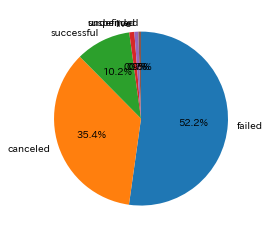

In [4]:
#目的変数とすべきstateの概観
labels = df['state'].unique()
state = df["state"].value_counts() 
state_rate = round(state / len(df["state"]) * 100,2)
print('プロジェクト成功の割合')
print(state_rate)
plt.pie(state, labels=labels,counterclock=False, startangle=90,autopct="%1.1f%%")

successful, failed, 以外にもstateが複数存在する。
とりあえず目的変数はsuccessful, failedとする。
(cancelなどの中にも目標額を到達したものがありそうなのでそれを考慮して目的変数を作るというのもあり？)

In [5]:
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')].copy()
category_labels=df['category'].unique()
main_category_labels = df['main_category'].unique()
currency_labels = df['currency'].unique()
country_labels = df['country'].unique()

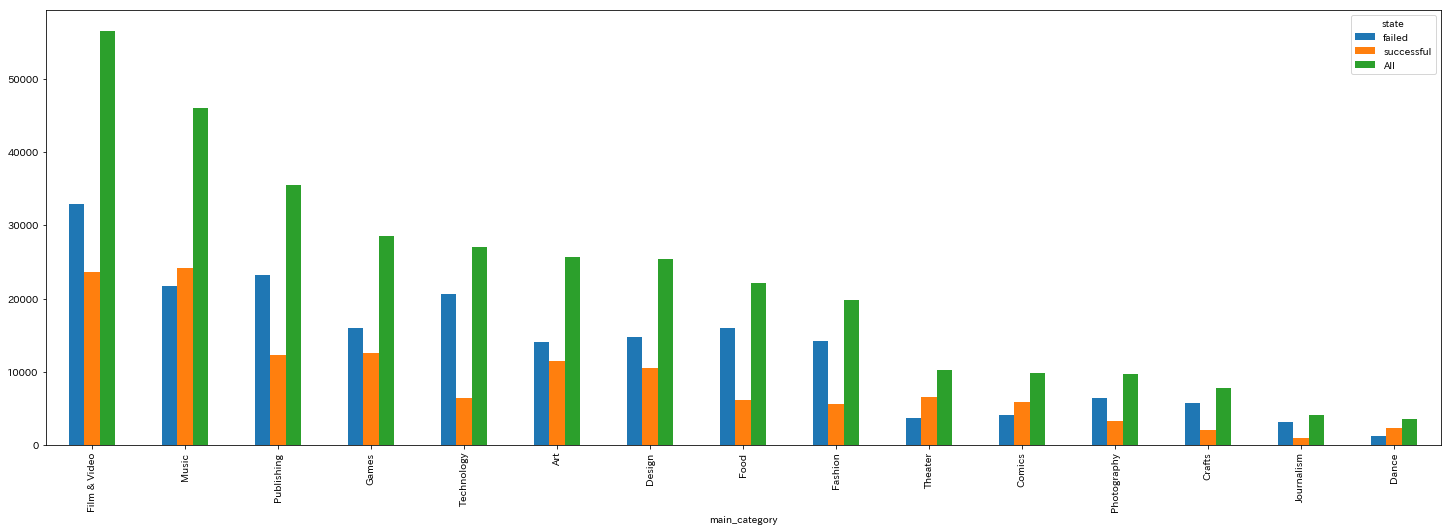

In [74]:
#pd.crosstab(df.main_category,df.state,margins=True).apply(lambda x: x/x.sum(), axis=1).plot(kind='bar',stacked=False,figsize=(20, 10))
main_category_crosstab = pd.crosstab(df.main_category,df.state,margins=True)
main_category_crosstab.sort_values(by='All',ascending=False).drop('All').plot(kind='bar',stacked=False,figsize=(25, 8))

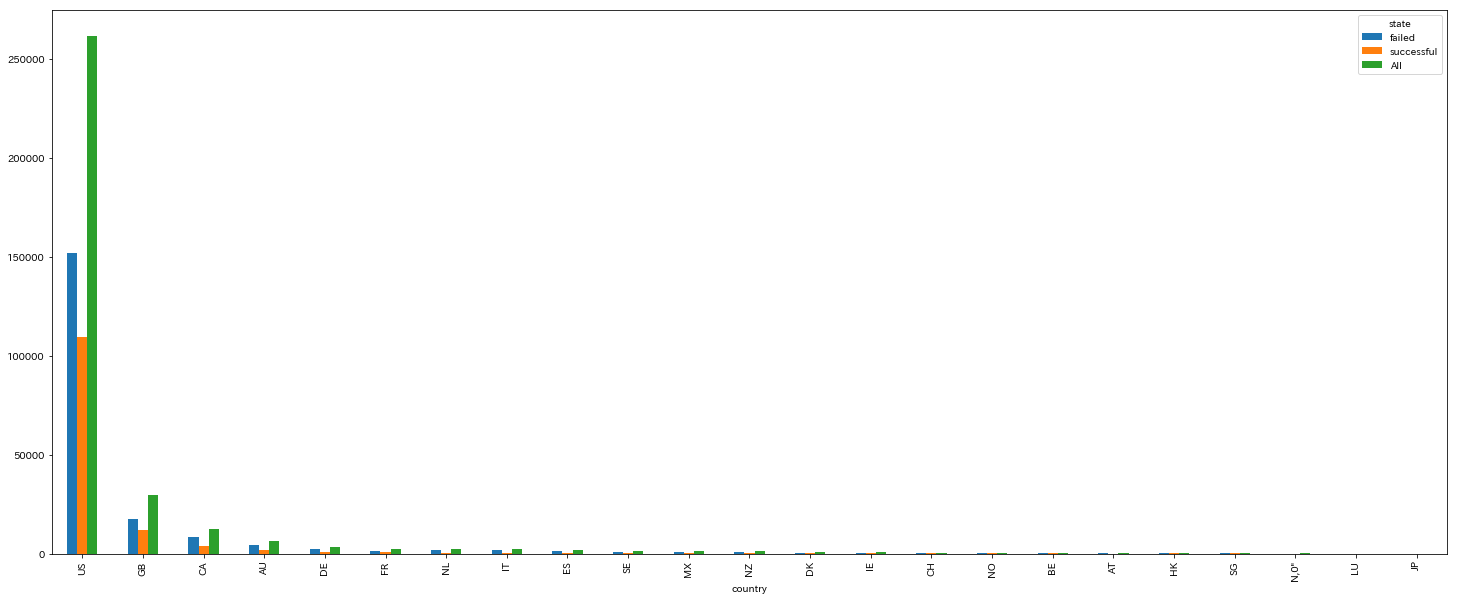

In [73]:
country_crosstab = pd.crosstab(df.country,df.state,margins=True)
country_crosstab.sort_values(by='All',ascending=False).drop('All').plot(kind='bar',stacked=False,figsize=(25, 10))

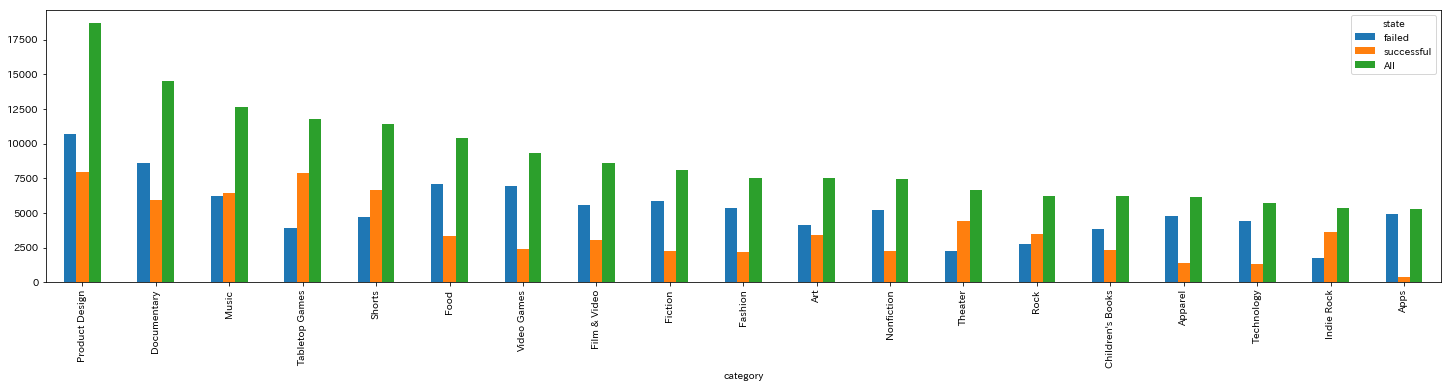

In [72]:
category_crosstab = pd.crosstab(df['category'],df.state,margins=True)
category_crosstab.sort_values(by='All',ascending=False)[:20].drop('All').plot(kind='bar',stacked=False,figsize=(25, 5))

In [71]:
category_crosstab.sort_values(by='All',ascending=False)[:10]

state,failed,successful,All
category,,,
All,197719,133956,331675
Product Design,10718,7962,18680
Documentary,8599,5924,14523
Music,6201,6432,12633
Tabletop Games,3878,7866,11744
Shorts,4721,6673,11394
Food,7119,3297,10416
Video Games,6942,2386,9328
Film & Video,5554,3070,8624


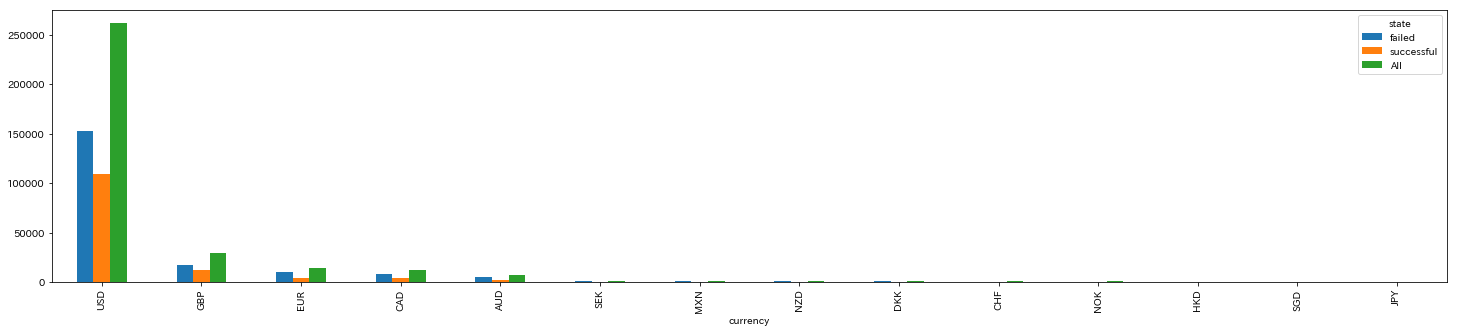

In [75]:
currency_crosstab = pd.crosstab(df.currency,df.state,margins=True)
currency_crosstab.sort_values(by='All',ascending=False).drop('All').plot(kind='bar',stacked=False,figsize=(25, 5))

## 説明変数確認

### 列名整理

id:id<br/>
name:プロジェクト名<br/>
category:サブカテゴリ<br/>
main_category:メインカテゴリ<br/>
currency:通貨（プロジェクト地域の通貨が表示されるっぽい）<br/>
deadline:調達期限<br/>
goal:目標最小金額<br/>
launched:プロジェクトローンチ日時（キックスターター開始日時）　<br/>
pledged:実際の調達額（usdベースではない予感)<br/>
state:プロジェクト成否　目的変数<br/>
backers:支持者数<br/>
country:国<br/>
usdpledged:USドルでの調達？<br/>
usd_pledged_real:USDに引き直した調達額<br/>
usd_goal_real:USDに引き直した調達額<br/>

### 欠損値確認

In [10]:
print(df.shape)
print(len(df['ID']))
df.isnull().sum()

(331675, 15)
331675


ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

nameとusd　pledgedに欠損値。
name,idを説明変数にするのは困難なので除外。
goal,usd_goal_realは共に目標金額を表しており、<font color="Blue">usd_goal_real</font>がUSDで引き直した金額を示しているようなので、goalを説明変数から除外<br/>
pleged, usd pledged, usd_pleaged_real　はそれぞれ実際の調達額を示しているようだが、
上記のgoalと同様と思われるのので <font color="Blue">usd_pleaged_real</font>のみ説明変数として採用。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1243ba240>,
      dtype=object)

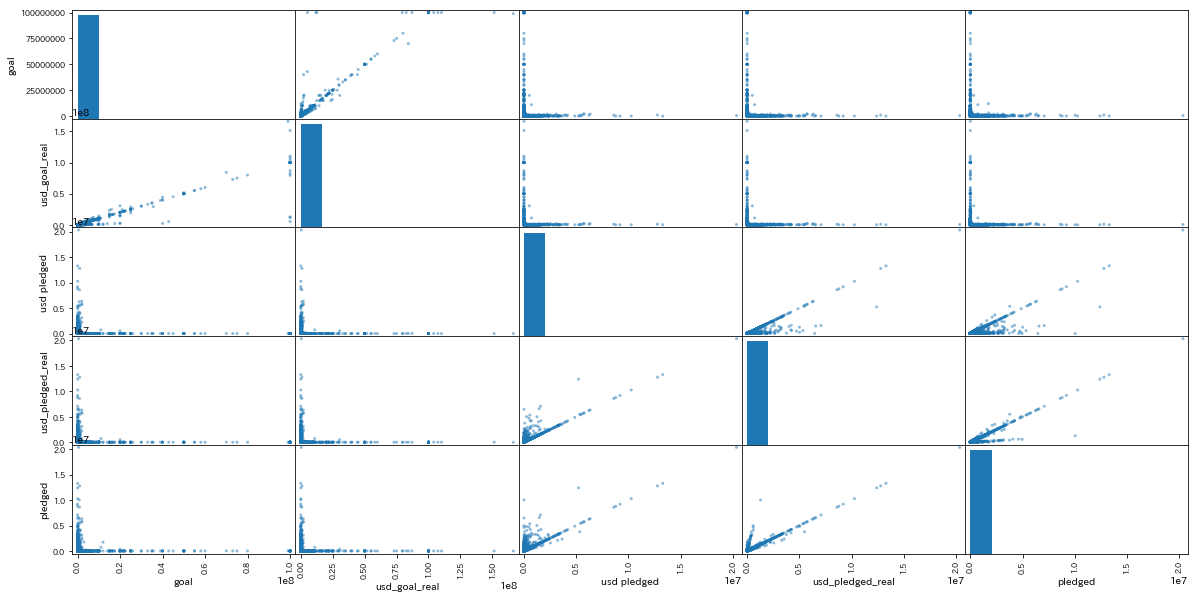

In [11]:
#一応散布図行列で確認 
df_goal_pleaged = df[["goal","usd_goal_real","usd pledged","usd_pledged_real","pledged"]]
pd.plotting.scatter_matrix(df_goal_pleaged,figsize=(20,10))

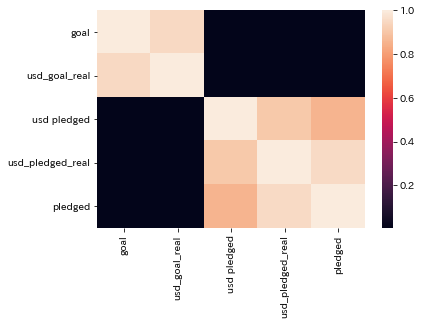

,goal,usd_goal_real,usd pledged,usd_pledged_real,pledged
goal,1.000000,0.952614,0.006416,0.005955,0.007965
usd_goal_real,0.952614,1.000000,0.006965,0.006354,0.005722
usd pledged,0.006416,0.006965,1.000000,0.907713,0.857966
usd_pledged_real,0.005955,0.006354,0.907713,1.000000,0.953571
pledged,0.007965,0.005722,0.857966,0.953571,1.000000


In [12]:
#相関係数もついでに
sns.heatmap(df_goal_pleaged.corr())
plt.show()
df_goal_pleaged.corr()

ほぼ同様のデータを示しているようであるため除外することにしたが、無相関化するなどするべき？

## 説明変数を作成

category, 
main_category, 
currency, 
country
はカテゴリ変数のため、ダミー変換する必要がある。<br/>

In [13]:
explanatory_df = df.copy()

In [14]:
explanatory_df = explanatory_df.drop('ID',1)
explanatory_df = explanatory_df.drop('name', 1)
explanatory_df = explanatory_df.drop('pledged',1)
explanatory_df = explanatory_df.drop('usd pledged',1)
explanatory_df = explanatory_df.drop('goal',1)

deadline,launchedは日時データでそのまま使えないため、プロジェクトの期間(日数)として変換して変数化してみる。

In [15]:
explanatory_df['launched'] = pd.to_datetime(explanatory_df['launched'])
explanatory_df['deadline'] = pd.to_datetime(explanatory_df['deadline'])
explanatory_df['project_period'] = explanatory_df['deadline'].subtract(explanatory_df['launched'])
explanatory_df['project_period'] = explanatory_df['project_period'].astype('timedelta64[D]')

explanatory_df = explanatory_df.drop('launched',1)
explanatory_df = explanatory_df.drop('deadline',1)

category, main_category, currency, country はカテゴリ変数のため、ダミーへ変換

In [16]:
explanatory_df = pd.get_dummies(explanatory_df, columns = ['main_category'])
explanatory_df = pd.get_dummies(explanatory_df, columns = ['category'])
explanatory_df = pd.get_dummies(explanatory_df, columns = ['currency'])
explanatory_df = pd.get_dummies(explanatory_df, columns = ['country'])

目的変数をラベル化

In [17]:
mapping_success = {'successful': 1, 'failed':0 }
explanatory_df['state'] = explanatory_df['state'].map(mapping_success)

In [18]:
explanatory_df.head(3)

,state,backers,usd_pledged_real,usd_goal_real,project_period,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0,0.0,1533.95,58.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,15,2421.0,30000.00,59.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,220.0,45000.00,44.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


 ## 確率的勾配法で学習

In [19]:
y = explanatory_df['state'].values
X = explanatory_df.drop('state', axis=1).values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

/Users/kaoru/.pyenv/versions/3.6.7/envs/ml_lecture/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
clf.coef_.shape

(1, 215)

## labelを予測

### 確率的勾配降下法

In [41]:
#データをテスト用、訓練用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [35]:
#確率的勾配降下法
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X_train, y_train)

/Users/kaoru/.pyenv/versions/3.6.7/envs/ml_lecture/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
# テストデータでラベルを予測
y_est = clf.predict(X_test)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y_test ,y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

対数尤度 = -0.005
正答率 = 99.985%


In [38]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = kickstarter失敗', '正解 = kickstarter成功'], 
                        columns=['予測 = kickstarter失敗', '予測 = kickstarter成功'])
conf_mat

,予測 = kickstarter失敗,予測 = kickstarter成功
正解 = kickstarter失敗,39727,1
正解 = kickstarter成功,9,26598


In [39]:
print('適合率:{:.3f}%'.format(100 * precision_score(y_test,y_est)))
print('再現率:{:.3f}%'.format(100 * recall_score(y_test,y_est)))
print('F値:{:.3f}%'.format(100 * f1_score(y_test,y_est)))

適合率:99.996%
再現率:99.966%
F値:99.981%


In [44]:
coeff_df = pd.DataFrame(explanatory_df.columns.delete(0))
coeff_df.columns = ['説明変数']
coeff_df["重み"] = pd.Series(clf.coef_[0])

coeff_df.sort_values(by='重み', ascending=False)[0:10]

,説明変数,重み
1,usd_pledged_real,385487.405744
0,backers,2528.740577
10,main_category_Film & Video,26.083131
58,category_Documentary,18.630447
11,main_category_Food,16.997632
201,country_GB,14.049530
183,currency_GBP,14.049530
16,main_category_Publishing,13.248583
4,main_category_Art,11.414591
77,category_Food,11.361540


In [46]:
logisreg = LogisticRegression()
logisreg.fit(X_train, y_train)
logisreg_predict = logisreg.predict(X_test)
# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, logisreg_predict)))

/Users/kaoru/.pyenv/versions/3.6.7/envs/ml_lecture/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


正答率 = 99.910%


In [56]:
LRcoeff_df = pd.DataFrame(explanatory_df.columns.delete(0))
LRcoeff_df.columns = ['説明変数']
LRcoeff_df["重み"] = pd.Series(logisreg.coef_[0])
LRcoeff_df.sort_values(by='重み', ascending=False)[0:10]

,説明変数,重み
1,usd_pledged_real,0.032484
3,project_period,0.011417
0,backers,0.006836
191,currency_USD,0.000335
214,country_US,0.000335
14,main_category_Music,0.000102
10,main_category_Film & Video,0.000101
4,main_category_Art,0.000064
183,currency_GBP,0.000063
201,country_GB,0.000063
